In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# warnings.filterwarnings("ignore")  # Disabling warnings

In [2]:
df = pd.read_csv("./h2h_assignment_dataset.csv")
df.head(10)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0
5,CA02,0140106181,THE corporation,2019-12-04 00:00:00,2019.0,2.960581e+09,2019-09-20,20190920,20190920,20191004.0,CAD,RV,1.0,NaN,22225.84,20190924.0,CA10,2.960581e+09,0
6,U001,0200769623,WAL-MAR in,2019-11-12 00:00:00,2019.0,1.930083e+09,2019-11-01,20191031,20191101,20191116.0,USD,RV,1.0,NaN,7358.49,20191101.0,NAH4,1.930083e+09,0
7,U001,0200744019,TARG us,NaN,2020.0,1.930659e+09,2020-03-19,20200318,20200319,20200403.0,USD,RV,1.0,NaN,11173.02,20200319.0,NAA8,1.930659e+09,1
8,U001,0200769623,WAL-MAR corp,2019-06-18 00:00:00,2019.0,1.929440e+09,2019-06-07,20190605,20190607,20190622.0,USD,RV,1.0,NaN,15995.04,20190607.0,NAH4,1.929440e+09,0
9,U001,0200762301,C&S WH systems,2019-03-06 00:00:00,2019.0,1.928819e+09,2019-02-20,20190219,20190220,20190307.0,USD,RV,1.0,NaN,28.63,20190220.0,NAC6,1.928819e+09,0


In [3]:
df.shape  # Getting the dimensions of the dataset

(50000, 19)

---

## Finding Count of Unique Values

In [4]:
df.nunique().sort_values(ascending=False)

doc_id                    48839
invoice_id                48833
total_open_amount         44349
name_customer              4197
cust_number                1425
due_in_date                 547
document_create_date        507
posting_date                506
document_create_date.1      506
baseline_create_date        506
clear_date                  403
cust_payment_terms           74
business_code                 6
document type                 2
invoice_currency              2
buisness_year                 2
isOpen                        2
posting_id                    1
area_business                 0
dtype: int64

## Calculating the Sum of NaN

In [5]:
df.isnull().sum().sort_values(ascending=False)

area_business             50000
clear_date                10000
invoice_id                    6
business_code                 0
invoice_currency              0
cust_payment_terms            0
baseline_create_date          0
total_open_amount             0
posting_id                    0
document type                 0
due_in_date                   0
cust_number                   0
document_create_date.1        0
document_create_date          0
posting_date                  0
doc_id                        0
buisness_year                 0
name_customer                 0
isOpen                        0
dtype: int64

---

# Null Value Imputation
## Filtering "clear_date" column

> This separation would be the first step towards filtering and estimating the payment date

In [6]:
clear_date_filter = df["clear_date"].notnull()
df_clear_date = df[clear_date_filter].copy()

df_clear_date.loc[0:9, ["clear_date"]]  # Printing the first 10 clear_dates

,clear_date
0,2020-02-11 00:00:00
1,2019-08-08 00:00:00
2,2019-12-30 00:00:00
4,2019-11-25 00:00:00
5,2019-12-04 00:00:00
6,2019-11-12 00:00:00
8,2019-06-18 00:00:00
9,2019-03-06 00:00:00


In [7]:
df_clear_date.nunique()

business_code                 6
cust_number                1344
name_customer              3889
clear_date                  403
buisness_year                 2
doc_id                    39158
posting_date                424
document_create_date        427
document_create_date.1      424
due_in_date                 491
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         35664
baseline_create_date        431
cust_payment_terms           70
invoice_id                39152
isOpen                        1
dtype: int64

 **Confirming there are no `null` in "clear_dates" column**

In [8]:
clear_date_filter.isnull().sum()  # Should print 0, representing no null values

0

## Returning the NaN clear_dates

> Tilde `~` operator is used to invert a filter in pandas. [Documentation](https://blog.finxter.com/tilde-python-pandas-dataframe/#:~:text=Python's%20Tilde%20~n%20operator%20is,1%20and%20~101%20becomes%20010%20.)


In [9]:
null_clear_dates = df[~clear_date_filter].copy()

null_clear_dates["clear_date"].head(10)  # First 10 NaN from clear_date
# null_clear_dates.head(10)  # First 10 NaN from clear_date

3     NaN
7     NaN
10    NaN
14    NaN
15    NaN
22    NaN
25    NaN
27    NaN
35    NaN
37    NaN
Name: clear_date, dtype: object

**Checking the number of unique values**

In [10]:
null_clear_dates.nunique()

business_code                6
cust_number                694
name_customer             1766
clear_date                   0
buisness_year                1
doc_id                    9681
posting_date                83
document_create_date        91
document_create_date.1      83
due_in_date                124
invoice_currency             2
document type                1
posting_id                   1
area_business                0
total_open_amount         9079
baseline_create_date        83
cust_payment_terms          43
invoice_id                9681
isOpen                       1
dtype: int64

In [11]:
data_na_test = null_clear_dates.copy()  # Setting aside the test data, will be handy at last for predicting the expected payment date.

## Schema definition for the above copied dataframe (test-dataset)

In [12]:
data_na_test.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

---

<h1> Preprocessing</h1>

### Dropping the "clear_data" column as it is NaN, and we need to predict that at the end

Dropping from `null_clear_dates` dataframe

In [13]:
null_clear_dates.drop(columns=["clear_date"], axis=1, inplace=True)

In [14]:
null_clear_dates.shape

(10000, 18)

## Formatting Dates

In [15]:
# dt and dts are new columns that will contain the formatted dates
# dt2 has the extra column "clear_date" that would come handy in the test data
dt = ["due_in_date",
      "document_create_date",
      "document_create_date.1",
      "baseline_create_date", ]

dt2 = dt.copy()
dt2.append("clear_date")

In [16]:
# doc -> Document creation date
# Copying two columns of null_clear_dates dataframe so to correlate them later
doc_c_dt = df_clear_date["document_create_date.1"] = df_clear_date["document_create_date.1"].astype("int")

In [17]:
doc_c_dt2 = df_clear_date["document_create_date"] = df_clear_date["document_create_date"].astype("int")

In [18]:
# Displaying the date columns that are in numeric (float) format -> integer (int) format
pd.concat([df_clear_date[dt], null_clear_dates[dt]]).dtypes

due_in_date               float64
document_create_date        int64
document_create_date.1      int64
baseline_create_date      float64
dtype: object

In [19]:
# Converting possible integer dates
for x in df_clear_date[dt]:
    df_clear_date[dt] = df_clear_date[dt].astype("int")

for x in null_clear_dates[dt]:
    null_clear_dates[dt] = null_clear_dates[dt].astype("int")

### Post Conversion of dates to Int

In [20]:
pd.concat([df_clear_date[dt], null_clear_dates[dt]]).dtypes

due_in_date               int32
document_create_date      int32
document_create_date.1    int32
baseline_create_date      int32
dtype: object

In [21]:
# Converting some to string which are in supported pandas datetime
for x in df_clear_date[dt2]:
    df_clear_date[dt2] = df_clear_date[dt2].astype("str")

for x in null_clear_dates[dt]:
    null_clear_dates[dt] = null_clear_dates[dt].astype("str")

---

## Conversion to Pandas Datetime

In [22]:
# converting to Datetime datatype

df_clear_date["due_in_date"] = pd.to_datetime(
    df_clear_date["due_in_date"], format="%Y-%m-%d"
).dt.date
df_clear_date["clear_date"] = pd.to_datetime(
    df_clear_date["clear_date"], format="%Y-%m-%d"
).dt.date
df_clear_date["document_create_date"] = pd.to_datetime(
    df_clear_date["document_create_date"], format="%Y-%m-%d"
).dt.date
df_clear_date["document_create_date.1"] = pd.to_datetime(
    df_clear_date["document_create_date.1"], format="%Y-%m-%d"
).dt.date
df_clear_date["posting_date"] = pd.to_datetime(
    df_clear_date["posting_date"], format="%Y-%m-%d"
).dt.date
df_clear_date["baseline_create_date"] = pd.to_datetime(
    df_clear_date["baseline_create_date"], format="%Y-%m-%d"
).dt.date

In [23]:
# converting to Datetime datatype

null_clear_dates["due_in_date"] = pd.to_datetime(
    null_clear_dates["due_in_date"], format="%Y-%m-%d"
).dt.date
# data_null['clear_date']=pd.to_datetime(data_null['clear_date'],format='%Y-%m-%d').dt.date
null_clear_dates["document_create_date"] = pd.to_datetime(
    null_clear_dates["document_create_date"], format="%Y-%m-%d"
).dt.date
null_clear_dates["document_create_date.1"] = pd.to_datetime(
    null_clear_dates["document_create_date.1"], format="%Y-%m-%d"
).dt.date
null_clear_dates["posting_date"] = pd.to_datetime(
    null_clear_dates["posting_date"], format="%Y-%m-%d"
).dt.date
null_clear_dates["baseline_create_date"] = pd.to_datetime(
    null_clear_dates["baseline_create_date"], format="%Y-%m-%d"
).dt.date

### Checking successful Pandas Datetime conversion of the date features

In [24]:
null_clear_dates

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
3,CA02,0140105686,SYSC llc,2020.0,2.960623e+09,2020-03-30,2020-03-30,2020-03-30,2020-04-10,CAD,RV,1.0,NaN,3299.70,2020-03-31,CA10,2.960623e+09,1
7,U001,0200744019,TARG us,2020.0,1.930659e+09,2020-03-19,2020-03-18,2020-03-19,2020-04-03,USD,RV,1.0,NaN,11173.02,2020-03-19,NAA8,1.930659e+09,1
10,U001,0200418007,AM,2020.0,1.930611e+09,2020-03-11,2020-03-06,2020-03-11,2020-03-26,USD,RV,1.0,NaN,3525.59,2020-03-11,NAA8,1.930611e+09,1
14,U001,0200739534,OK systems,2020.0,1.930788e+09,2020-04-15,2020-04-15,2020-04-15,2020-04-30,USD,RV,1.0,NaN,121105.65,2020-04-15,NAA8,1.930788e+09,1
15,U001,0200353024,DECA corporation,2020.0,1.930817e+09,2020-04-23,2020-04-23,2020-04-23,2020-04-26,USD,RV,1.0,NaN,3726.06,2020-04-16,NAM2,1.930817e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,0200769623,WAL-MAR in,2020.0,1.930625e+09,2020-03-10,2020-03-09,2020-03-10,2020-03-25,USD,RV,1.0,NaN,13114.99,2020-03-10,NAH4,1.930625e+09,1
49980,U001,0200769623,WAL-MAR corporation,2020.0,1.930851e+09,2020-05-03,2020-05-02,2020-05-03,2020-05-18,USD,RV,1.0,NaN,8899.71,2020-05-03,NAH4,1.930851e+09,1
49982,U001,0200148860,DOLLA co,2020.0,1.930638e+09,2020-03-11,2020-03-11,2020-03-11,2020-03-26,USD,RV,1.0,NaN,4967.06,2020-03-11,NAA8,1.930638e+09,1
49992,U001,0200900909,SYSCO co,2020.0,1.930702e+09,2020-03-25,2020-03-25,2020-03-25,2020-04-09,USD,RV,1.0,NaN,1998.64,2020-03-25,NAA8,1.930702e+09,1


In [25]:
# We have 6 null entries in "invoice_ic" feature
df_clear_date[df_clear_date["invoice_id"].isnull()].shape

(6, 19)

---

## Error Check

**Checking for an error with custom due_date_filter (Due date should not be less than baseline_create_date)**

In [26]:
due_date_filter = df["due_in_date"] < df["baseline_create_date"]
df[due_date_filter].shape

# Rows returned - 0 (No such error, good to go)

(0, 19)

**Checking for an error with filter (Clear date should not be less than baseline_create_date)**

In [27]:
# Checking with the other null dataset
df_clear_date[df_clear_date["clear_date"] < df_clear_date["baseline_create_date"]].shape

# This has to be an error

(2, 19)

In [28]:
df_clear_date.shape

(40000, 19)

In [29]:
null_clear_dates.shape

(10000, 18)

**Removing the error**

In [30]:
df_clear_date.drop(df_clear_date[df_clear_date["clear_date"] < df_clear_date["baseline_create_date"]].index,
                   inplace=True, index=None)  # inplace -> Modify inplace or not (boolean)

In [31]:
df_clear_date.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-01-25,2020-01-26,2020-02-10,USD,RV,1.0,NaN,54273.28,2020-01-26,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-07-22,2019-07-22,2019-08-11,USD,RV,1.0,NaN,79656.60,2019-07-22,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-14,2019-09-14,2019-09-29,USD,RV,1.0,NaN,2253.86,2019-09-14,NAA8,1.929874e+09,0
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-13,2019-11-13,2019-11-28,USD,RV,1.0,NaN,33133.29,2019-11-13,NAH4,1.930148e+09,0
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-09-20,2019-09-20,2019-10-04,CAD,RV,1.0,NaN,22225.84,2019-09-24,CA10,2.960581e+09,0


In [32]:
df_clear_date.shape  # Earlier the shape was (40000, 19), NOW: (39998, 19)
# Removal successful 🧹

(39998, 19)

---

# Making the "delay" column

Formula for delay of payment date:
> clear_date - due_in_date

In [33]:
df_clear_date["delay"] = (df_clear_date["clear_date"] - df_clear_date["due_in_date"]).dt.days

In [117]:
df_clear_date["delay"].head()

0     1
1    -3
2    92
4    -3
5    61
Name: delay, dtype: int64

In [35]:
df_clear_date.describe()

,buisness_year,doc_id,posting_id,area_business,total_open_amount,invoice_id,isOpen,delay
count,39998.000000,3.999800e+04,39998.0,0.0,39998.000000,3.999200e+04,39998.0,39998.000000
mean,2019.132132,2.013481e+09,1.0,NaN,32061.969706,2.012358e+09,0.0,0.838442
std,0.338638,2.931565e+08,0.0,NaN,39524.195911,2.784660e+08,0.0,10.831443
min,2019.000000,1.928502e+09,1.0,NaN,0.790000,1.928502e+09,0.0,-89.000000
25%,2019.000000,1.929181e+09,1.0,NaN,4702.905000,1.929181e+09,0.0,-3.000000
50%,2019.000000,1.929733e+09,1.0,NaN,17283.500000,1.929733e+09,0.0,0.000000
75%,2019.000000,1.930209e+09,1.0,NaN,46542.090000,1.930208e+09,0.0,2.000000
max,2020.000000,9.500000e+09,1.0,NaN,668593.360000,2.960617e+09,0.0,204.000000


---

# Statistics

# Visualizing Delay of payment with boxplot

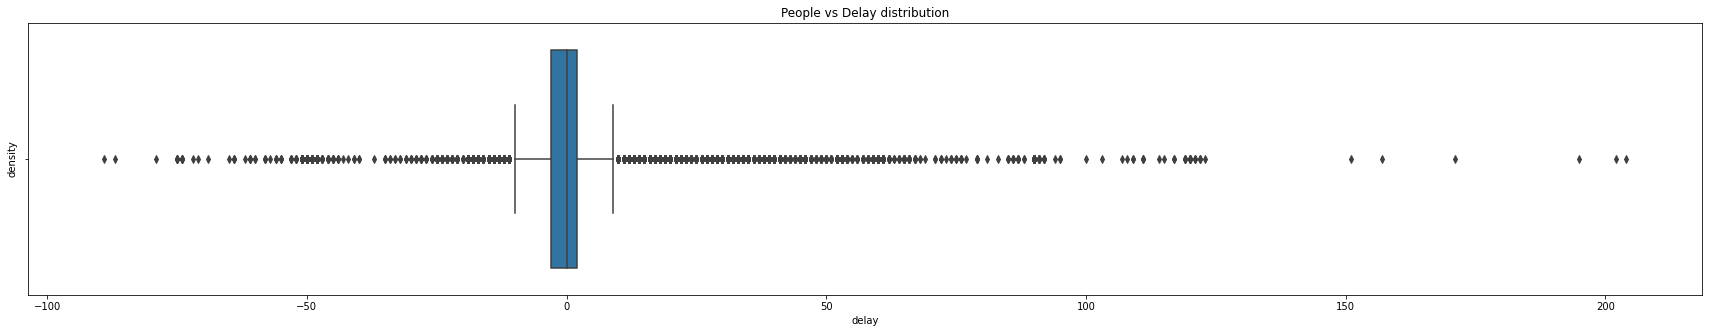

In [70]:
import seaborn as sns

fig = plt.figure(figsize=(30, 5))
ax = fig.add_subplot()
ax.set_title("People vs Delay distribution")
sns.boxplot(x=df_clear_date["delay"], )
plt.ylabel("density")
plt.show()

_The boxplot graph above is showing the density of delays, which concludes that maximum people submitted their dues with 0 delays_

Text(0, 0.5, 'density')

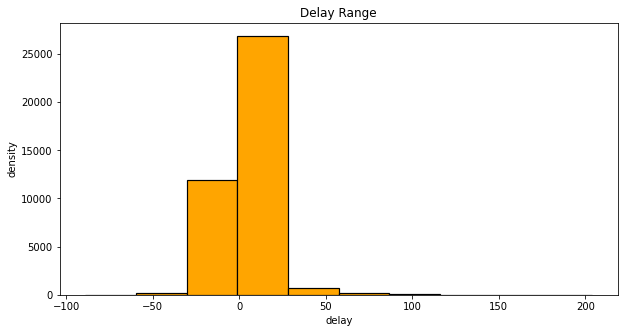

In [81]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
ax.set_title("Delay Range")

plt.hist(df_clear_date["delay"], color='orange', edgecolor='black', linewidth=1.2)
plt.xlabel("delay")
plt.ylabel("density")

_[Calculating the Interquartile Range using the inbuilt 'percentile' in numpy](https://www.geeksforgeeks.org/interquartile-range-and-quartile-deviation-using-numpy-and-scipy/)_

In [98]:
# Calculating the quartiles
Q1 = np.percentile(df_clear_date["delay"], 1, method='midpoint')
Q2 = np.percentile(df_clear_date["delay"], 50, method='midpoint')
Q3 = np.percentile(df_clear_date["delay"], 99.74, method='midpoint')


**[Interquartile Range (IQR) = Q3 - Q1](https://www.geeksforgeeks.org/interquartile-range-and-quartile-deviation-using-numpy-and-scipy/)**

In [97]:
IQR = Q3 - Q1

In [107]:

pd.DataFrame([{"25%": Q1, "50%": Q2, "75%": Q3, "IQR": IQR}], index=['*'])

,25%,50%,75%,IQR
*,-19.0,0.0,90.0,109.0


In [105]:
# Calculating the lower, upper limits for getting the outliers -> https://towardsdatascience.com/what-is-an-outlier-26888fd9870d
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

pd.DataFrame([{"UPPER LIMIT": upper_bound, "LOWER LIMIT": lower_bound}], index=['*'])

,UPPER LIMIT,LOWER LIMIT
*,253.5,-182.5


### Calculating the outlier in delay of payments

In [108]:
outlier = []
for x in df_clear_date["delay"]:
    if (x > upper_bound) or (x < lower_bound):
        outlier.append(x)

outlier

[]

In [110]:
# Remove the outlier if any
df_clear_date.drop(df_clear_date[df_clear_date["delay"] > upper_bound].index, index=None, inplace=True)

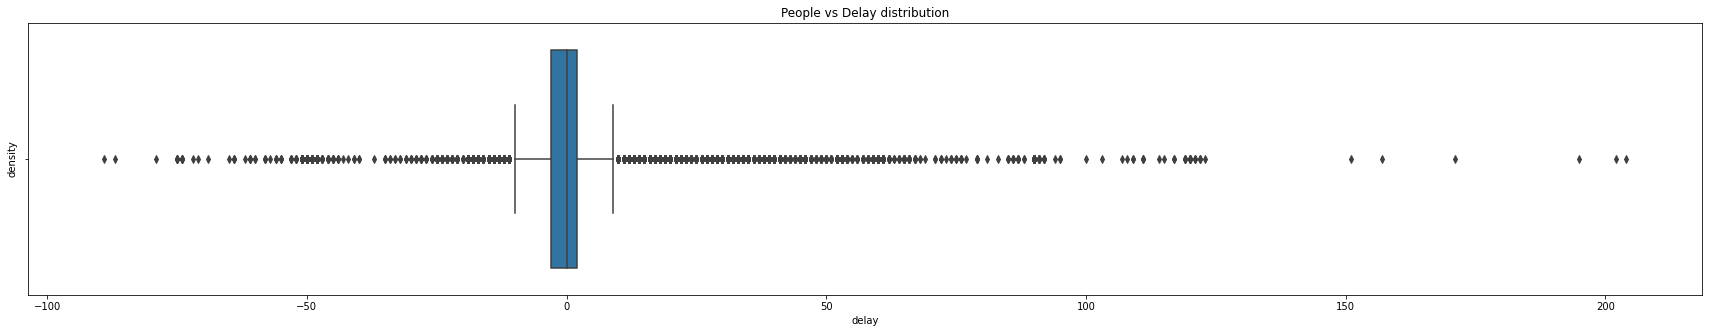

In [113]:
fig = plt.figure(figsize=(30, 5))
ax = fig.add_subplot()
ax.set_title("People vs Delay distribution")
sns.boxplot(x=df_clear_date["delay"], )
plt.ylabel("density")
plt.show()

---

# [Train-Test Split](https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/)

In [118]:
df_clear_date.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-01-25,2020-01-26,2020-02-10,USD,RV,1.0,NaN,54273.28,2020-01-26,NAH4,1.930438e+09,0,1
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-07-22,2019-07-22,2019-08-11,USD,RV,1.0,NaN,79656.60,2019-07-22,NAD1,1.929646e+09,0,-3
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-14,2019-09-14,2019-09-29,USD,RV,1.0,NaN,2253.86,2019-09-14,NAA8,1.929874e+09,0,92
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-13,2019-11-13,2019-11-28,USD,RV,1.0,NaN,33133.29,2019-11-13,NAH4,1.930148e+09,0,-3
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-09-20,2019-09-20,2019-10-04,CAD,RV,1.0,NaN,22225.84,2019-09-24,CA10,2.960581e+09,0,61


In [121]:
X = df_clear_date.drop("delay", axis=1)
y = df_clear_date["delay"]

df_clear_date.shape

(39998, 20)

In [119]:
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=.2, random_state=10)

X_train.shape, X_test.shape

((31998, 19), (8000, 19))

**Splitting X_test into X-validation and X_test1**

In [137]:
X_validate, X_test1, y_validate, y_test1 = train_test_split(X_test, y_test, train_size=.5,
                                                            shuffle=False)  # Doing a 50-50 split

X_validate.shape, X_test1.shape

((4000, 19), (4000, 19))

---

# Exploratory Data Analysis (EDA)

1. [Article Read](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15)
2. [Article Read, Step by Step Guide](https://www.analyticsvidhya.com/blog/2021/05/exploratory-data-analysis-eda-a-step-by-step-guide/)

In [139]:
X_train["delay"] = pd.DataFrame(y_train, X_train.index)

In [143]:
X_train.sort_index(axis=1)  # Print the dataset in sorted column names order

,area_business,baseline_create_date,buisness_year,business_code,clear_date,cust_number,cust_payment_terms,delay,doc_id,document type,document_create_date,document_create_date.1,due_in_date,invoice_currency,invoice_id,isOpen,name_customer,posting_date,posting_id,total_open_amount
18601,NaN,2019-03-06,2019.0,U001,2019-03-18,200769623,NAH4,-3,1.928908e+09,RV,2019-03-05,2019-03-06,2019-03-21,USD,1.928908e+09,0,WAL-MAR us,2019-03-06,1.0,65379.00
12509,NaN,2019-04-15,2019.0,U001,2019-05-01,0200735528,NAA8,1,1.929142e+09,RV,2019-04-13,2019-04-15,2019-04-30,USD,1.929142e+09,0,ASSOCIA corporation,2019-04-15,1.0,160240.27
26403,NaN,2019-03-13,2019.0,U001,2019-03-28,0200711029,NAA8,0,1.928946e+09,RV,2019-03-11,2019-03-13,2019-03-28,USD,1.928946e+09,0,WEGMAN llc,2019-03-13,1.0,49580.54
30251,NaN,2019-10-15,2019.0,U001,2019-10-30,0200762301,NAC6,0,1.930012e+09,RV,2019-10-14,2019-10-15,2019-10-30,USD,1.930012e+09,0,C&S WH,2019-10-15,1.0,29565.17
45983,NaN,2019-11-24,2019.0,U001,2019-12-09,0200726979,NAA8,0,1.930207e+09,RV,2019-11-30,2019-11-24,2019-12-09,USD,1.930207e+09,0,BJ'S associates,2019-11-24,1.0,422.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12658,NaN,2019-12-15,2019.0,U001,2019-12-30,0200726979,NAA8,0,1.930289e+09,RV,2019-12-17,2019-12-15,2019-12-30,USD,1.930289e+09,0,BJ'S associates,2019-12-15,1.0,642.66
11618,NaN,2019-06-21,2019.0,U001,2019-08-02,CCCA02,NAG2,7,1.929524e+09,RV,2019-06-21,2019-06-21,2019-07-26,USD,1.929524e+09,0,KRAFT foundation,2019-06-21,1.0,12965.40
34951,NaN,2019-02-18,2019.0,U001,2019-03-11,0200726979,NAA8,6,1.928807e+09,RV,2019-02-15,2019-02-18,2019-03-05,USD,1.928807e+09,0,BJ'S us,2019-02-18,1.0,16301.69
36449,NaN,2019-10-10,2019.0,U001,2019-10-25,0200707822,NAA8,0,1.929996e+09,RV,2019-10-10,2019-10-10,2019-10-25,USD,1.929996e+09,0,PUBLI us,2019-10-10,1.0,65149.21


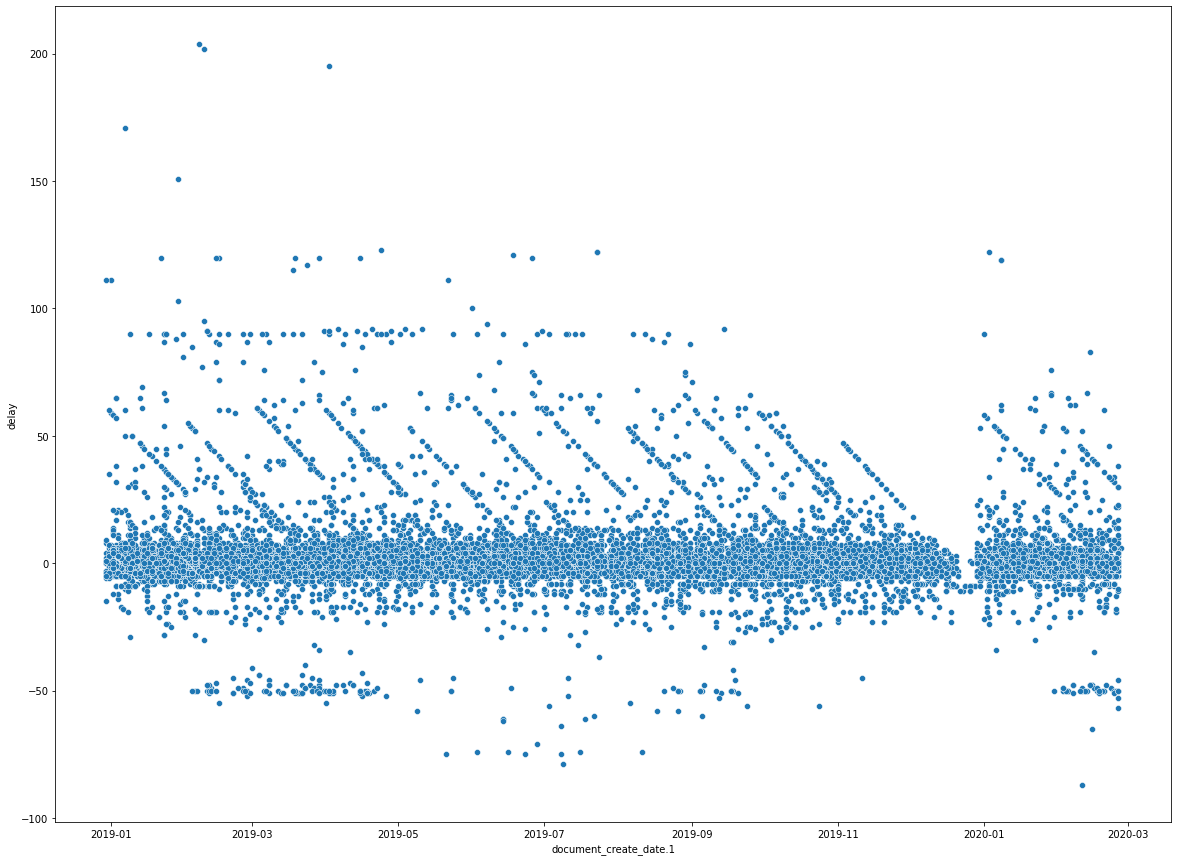

In [151]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x=X_train["document_create_date.1"], y=X_train["delay"])
plt.show()

In [153]:
map_customer_number = X_train.groupby("cust_number")["delay"].mean().to_dict()

X_train["mean_delay"] = X_train["cust_number"].map(map_customer_number)

In [154]:
X_validate["mean_delay"] = X_validate["cust_number"].map(map_customer_number)
X_validate["mean_delay"][X_validate["mean_delay"].isnull()] = X_train["delay"].mean()

C:\Users\Ankur Paul\AppData\Local\Temp\ipykernel_15708\235340273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_validate["mean_delay"][X_validate["mean_delay"].isnull()] = X_train["delay"].mean()


In [155]:
X_test1["mean_delay"] = X_test1["cust_number"].map(map_customer_number)
X_test1["mean_delay"][X_test1["mean_delay"].isnull()] = X_train["delay"].mean()

C:\Users\Ankur Paul\AppData\Local\Temp\ipykernel_15708\1625147399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test1["mean_delay"][X_test1["mean_delay"].isnull()]=X_train["delay"].mean()


In [156]:
X_train['delay'].mean()

0.8347396712294518

In [159]:
null_clear_dates["mean_delay"] = null_clear_dates["cust_number"].map(map_customer_number)
null_clear_dates["mean_delay"][null_clear_dates["mean_delay"].isnull()] = X_train[
    "delay"
].mean()

C:\Users\Ankur Paul\AppData\Local\Temp\ipykernel_15708\2180919052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_clear_dates["mean_delay"][null_clear_dates["mean_delay"].isnull()] = X_train[


In [160]:
map_customer_number

{'0100000048': 27.5,
 '0100000051': -17.666666666666668,
 '0100000158': 28.75,
 '0100000217': -1.0,
 '0100000222': -3.9047619047619047,
 '0100000272': 7.0,
 '0100000533': -15.0,
 '0100000564': 33.0,
 '0100000582': -7.5,
 '0100000843': -6.0,
 '0100000933': -4.0,
 '0100001196': 2.0517241379310347,
 '0100001222': 2.25,
 '0100001452': 0.0,
 '0100001659': -21.0,
 '0100003615': -12.0,
 '0100003940': 1.0,
 '0100004317': 0.0,
 '0100004335': 3.0,
 '0100004536': -0.8,
 '0100004744': 0.0,
 '0100004789': -1.0,
 '0100005721': -1.0,
 '0100005765': 45.0,
 '0100006176': 11.0,
 '0100006311': -1.6,
 '0100006671': 5.0,
 '0100006823': -3.0,
 '0100007796': 3.5,
 '0100007916': -25.0,
 '0100008001': -3.625,
 '0100008870': 0.0,
 '0100009932': 1.75,
 '0100010082': -30.0,
 '0100010265': 2.0,
 '0100010669': 2.0,
 '0100010880': 0.0,
 '0100011023': 0.0,
 '0100011571': 7.0,
 '0100011799': 1.3333333333333333,
 '0100011895': 1.0,
 '0100011958': 3.0,
 '0100012181': -19.0,
 '0100012482': -4.0,
 '0100012638': 3.25,
 '01

---

### Dropping Constant Features from Train, Test, Validation Set

In [161]:
constant_columns = ["posting_id",
                    "area_business",
                    "isOpen",
                    "document_create_date",
                    "posting_date",
                    "name_customer", ]

In [162]:
X_train.drop(columns=constant_columns, axis=1, inplace=True)

In [163]:
X_test1.drop(columns=constant_columns, axis=1, inplace=True)

In [164]:
X_validate.drop(columns=constant_columns, axis=1, inplace=True)

In [168]:
X_train.shape

(31998, 15)

---

### Finding correlation between independent variables

In [169]:
from scipy.stats import pearsonr

In [170]:
pearsonr(doc_c_dt, doc_c_dt2)

(0.9869898473092862, 0.0)

<AxesSubplot:title={'center':'doc create date vs doc create date1 (r=0.986990)'}, xlabel='document_create_date.1', ylabel='document_create_date'>

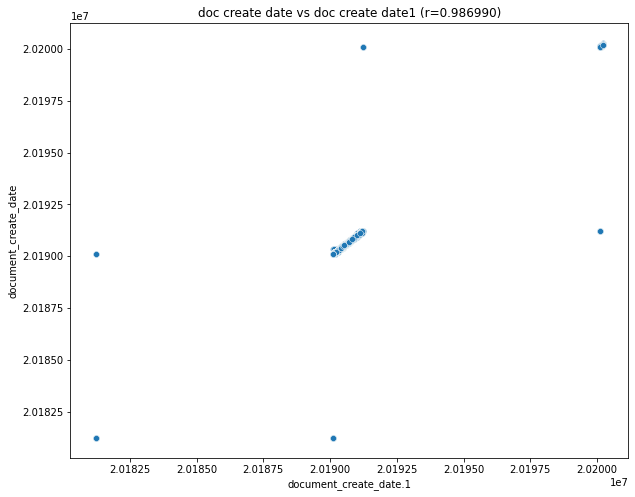

In [174]:
plt.figure(figsize=(10, 8))
plt.title("doc create date vs doc create date1 (r={0:02f})".format(pearsonr(doc_c_dt, doc_c_dt2)[0]))
sns.scatterplot(x=doc_c_dt, y=doc_c_dt2, data=df_clear_date)

_**Conclusion:** The data is highly correlated. The graph is linear to the outliers._
> Since these are independent variables, we can drop one of them from our features.

<AxesSubplot:title={'center':'due day vs delay'}, xlabel='total_open_amount', ylabel='delay'>

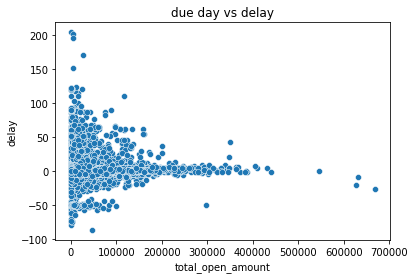

In [176]:
# This shows which customer has a delay for what amount pending
# This provides a great insight to clear dues at the earliest.
plt.title("delay vs total open amount")
sns.scatterplot(x=X_train["total_open_amount"], y=y_train)

In [177]:
df_clear_date

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-01-25,2020-01-26,2020-02-10,USD,RV,1.0,NaN,54273.28,2020-01-26,NAH4,1.930438e+09,0,1
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-07-22,2019-07-22,2019-08-11,USD,RV,1.0,NaN,79656.60,2019-07-22,NAD1,1.929646e+09,0,-3
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-14,2019-09-14,2019-09-29,USD,RV,1.0,NaN,2253.86,2019-09-14,NAA8,1.929874e+09,0,92
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-13,2019-11-13,2019-11-28,USD,RV,1.0,NaN,33133.29,2019-11-13,NAH4,1.930148e+09,0,-3
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-09-20,2019-09-20,2019-10-04,CAD,RV,1.0,NaN,22225.84,2019-09-24,CA10,2.960581e+09,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019-07-25,2019.0,1.929601e+09,2019-07-10,2019-07-09,2019-07-10,2019-07-25,USD,RV,1.0,NaN,84780.40,2019-07-10,NAC6,1.929601e+09,0,0
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-14,2019-08-15,2019-08-30,USD,RV,1.0,NaN,6766.54,2019-08-15,NAH4,1.929744e+09,0,4
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-02-18,2020-02-19,2020-03-05,USD,RV,1.0,NaN,6120.86,2020-02-19,NAA8,1.930537e+09,0,0
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-11-26,2019-11-27,2019-12-12,USD,RV,1.0,NaN,63.48,2019-11-27,NAA8,1.930199e+09,0,0


---

# Feature Engineering

1. Since we found a high correlation from the above graph, we can proceed dropping the column 'invoice_id'
2. doc_id is also an unnecessary column to predict date, thus dropping it


In [181]:
column_names = ['doc_id', 'invoice_id']

X_train.drop(column_names, axis=1, inplace=True)
X_test1.drop(column_names, axis=1, inplace=True)
X_validate.drop(column_names, axis=1, inplace=True)
null_clear_dates.drop(column_names, axis=1, inplace=True)

In [187]:
# Making features from due_date
X_train["due_dt_week"] = pd.to_datetime(X_train["due_in_date"]).dt.isocalendar().week  # Getting the week
X_train["due_dt_mon"] = pd.to_datetime(X_train["due_in_date"]).dt.month
X_train["due_dt_day_of_week"] = pd.to_datetime(
    X_train["due_in_date"]
).dt.dayofweek
X_train["due_dt_day"] = pd.to_datetime(X_train["due_in_date"]).dt.day

In [188]:
X_test1["due_dt_week"] = pd.to_datetime(X_test1["due_in_date"]).dt.isocalendar().week
X_test1["due_dt_mon"] = pd.to_datetime(X_test1["due_in_date"]).dt.month
X_test1["due_dt_day_of_week"] = pd.to_datetime(
    X_test1["due_in_date"]
).dt.dayofweek

In [190]:
X_validate["due_dt_week"] = pd.to_datetime(X_validate["due_in_date"]).dt.isocalendar().week
X_validate["due_dt_mon"] = pd.to_datetime(X_validate["due_in_date"]).dt.month
X_validate["due_dt_day_of_week"] = pd.to_datetime(X_validate["due_in_date"]).dt.dayofweek

In [192]:
null_clear_dates["due_dt_week"] = pd.to_datetime(null_clear_dates["due_in_date"]).dt.isocalendar().week
null_clear_dates["due_dt_mon"] = pd.to_datetime(null_clear_dates["due_in_date"]).dt.month
null_clear_dates["due_dt_day_of_week"] = pd.to_datetime(
    null_clear_dates["due_in_date"]
).dt.dayofweek

In [194]:
null_clear_dates.sort_index(axis=1)

,area_business,baseline_create_date,buisness_year,business_code,cust_number,cust_payment_terms,document type,document_create_date,document_create_date.1,due_dt_day_of_week,...,due_dt_week,due_in_date,invoice_currency,isOpen,mean_dates,mean_delay,name_customer,posting_date,posting_id,total_open_amount
3,NaN,2020-03-31,2020.0,CA02,0140105686,CA10,RV,2020-03-30,2020-03-30,4,...,15,2020-04-10,CAD,1,6.804651,6.804651,SYSC llc,2020-03-30,1.0,3299.70
7,NaN,2020-03-19,2020.0,U001,0200744019,NAA8,RV,2020-03-18,2020-03-19,4,...,14,2020-04-03,USD,1,2.231595,2.231595,TARG us,2020-03-19,1.0,11173.02
10,NaN,2020-03-11,2020.0,U001,0200418007,NAA8,RV,2020-03-06,2020-03-11,3,...,13,2020-03-26,USD,1,-1.621212,-1.621212,AM,2020-03-11,1.0,3525.59
14,NaN,2020-04-15,2020.0,U001,0200739534,NAA8,RV,2020-04-15,2020-04-15,3,...,18,2020-04-30,USD,1,1.993007,1.993007,OK systems,2020-04-15,1.0,121105.65
15,NaN,2020-04-16,2020.0,U001,0200353024,NAM2,RV,2020-04-23,2020-04-23,6,...,17,2020-04-26,USD,1,-4.141079,-4.141079,DECA corporation,2020-04-23,1.0,3726.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49975,NaN,2020-03-10,2020.0,U001,0200769623,NAH4,RV,2020-03-09,2020-03-10,2,...,13,2020-03-25,USD,1,-2.373147,-2.373147,WAL-MAR in,2020-03-10,1.0,13114.99
49980,NaN,2020-05-03,2020.0,U001,0200769623,NAH4,RV,2020-05-02,2020-05-03,0,...,21,2020-05-18,USD,1,-2.373147,-2.373147,WAL-MAR corporation,2020-05-03,1.0,8899.71
49982,NaN,2020-03-11,2020.0,U001,0200148860,NAA8,RV,2020-03-11,2020-03-11,3,...,13,2020-03-26,USD,1,-5.209302,-5.209302,DOLLA co,2020-03-11,1.0,4967.06
49992,NaN,2020-03-25,2020.0,U001,0200900909,NAA8,RV,2020-03-25,2020-03-25,3,...,15,2020-04-09,USD,1,1.243902,1.243902,SYSCO co,2020-03-25,1.0,1998.64


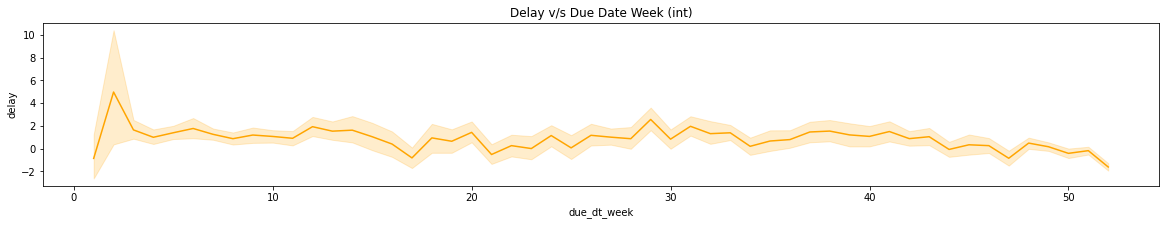

In [214]:
plt.figure(figsize=(20, 3))
plt.title("Delay v/s Due Date Week (int)")
sns.lineplot(x=X_train["due_dt_week"], y=X_train["delay"], color='orange')

plt.show()

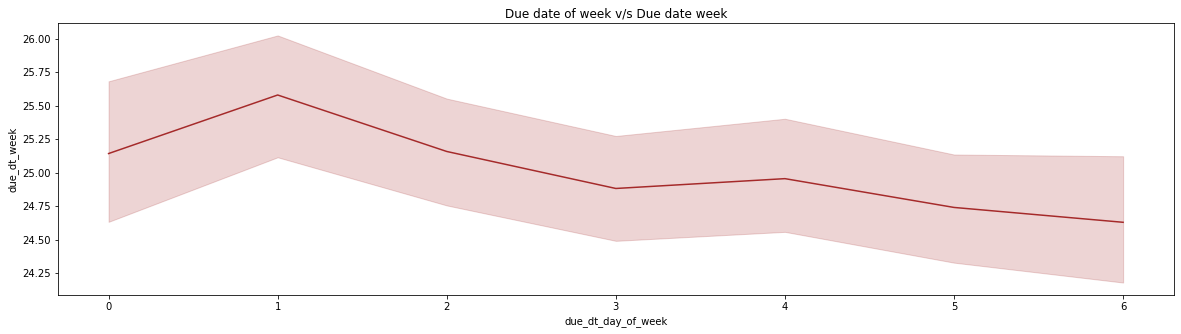

In [228]:
plt.figure(figsize=(20, 5))
sns.set_palette("deep")
sns.lineplot(x=X_train["due_dt_day_of_week"], y=X_train["due_dt_week"], color="brown")
plt.title("Due date of week v/s Due date week")

plt.show()

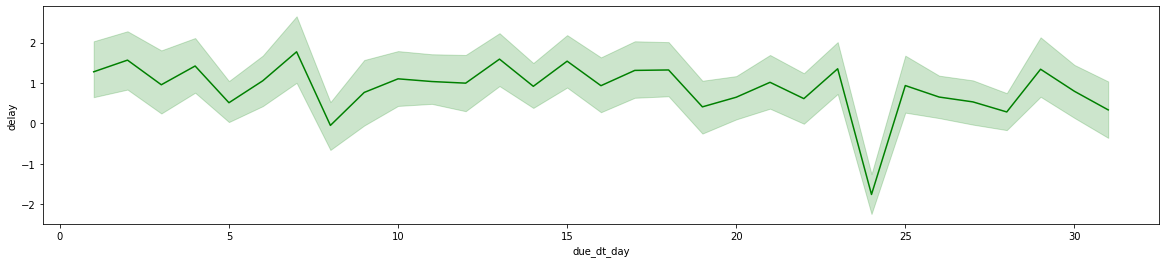

In [230]:
plt.figure(figsize=(20, 4))
sns.lineplot(x="due_dt_day", y="delay", data=X_train, color="green")

plt.show()

In [231]:
X_train.drop("due_dt_day", axis=1, inplace=True)  # due_dt_day column does not make sense

In [240]:
X_train['due_dt_mon'].value_counts()

2     4096
3     3397
5     2621
4     2583
11    2556
10    2550
8     2415
7     2413
6     2373
1     2349
9     2346
12    2299
Name: due_dt_mon, dtype: int64

<AxesSubplot:xlabel='due_dt_mon', ylabel='delay'>

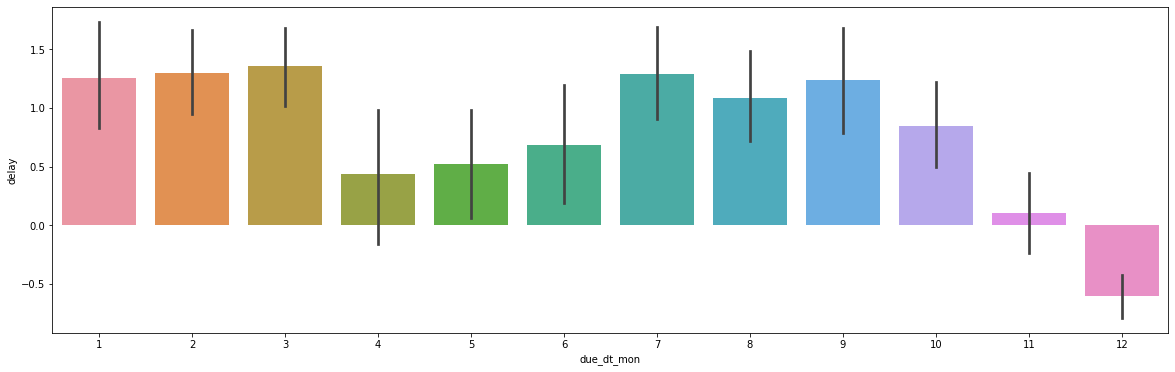

In [250]:
plt.figure(figsize=(20, 6))
sns.barplot(x="due_dt_mon", y="delay", data=X_train)

In [252]:
null_clear_dates["is_weekend"] = np.where(null_clear_dates["due_dt_day_of_week"] > 3, 1, 0)
X_train["is_weekend"] = np.where(X_train["due_dt_day_of_week"] > 3, 1, 0)
X_validate["is_weekend"] = np.where(X_validate["due_dt_day_of_week"] > 3, 1, 0)
X_test1["is_weekend"] = np.where(X_test1["due_dt_day_of_week"] > 3, 1, 0)


In [249]:
X_train['total_open_amount']

18601     65379.00
12509    160240.27
26403     49580.54
30251     29565.17
45983       422.42
           ...    
12658       642.66
11618     12965.40
34951     16301.69
36449     65149.21
21993      9032.42
Name: total_open_amount, Length: 31998, dtype: float64

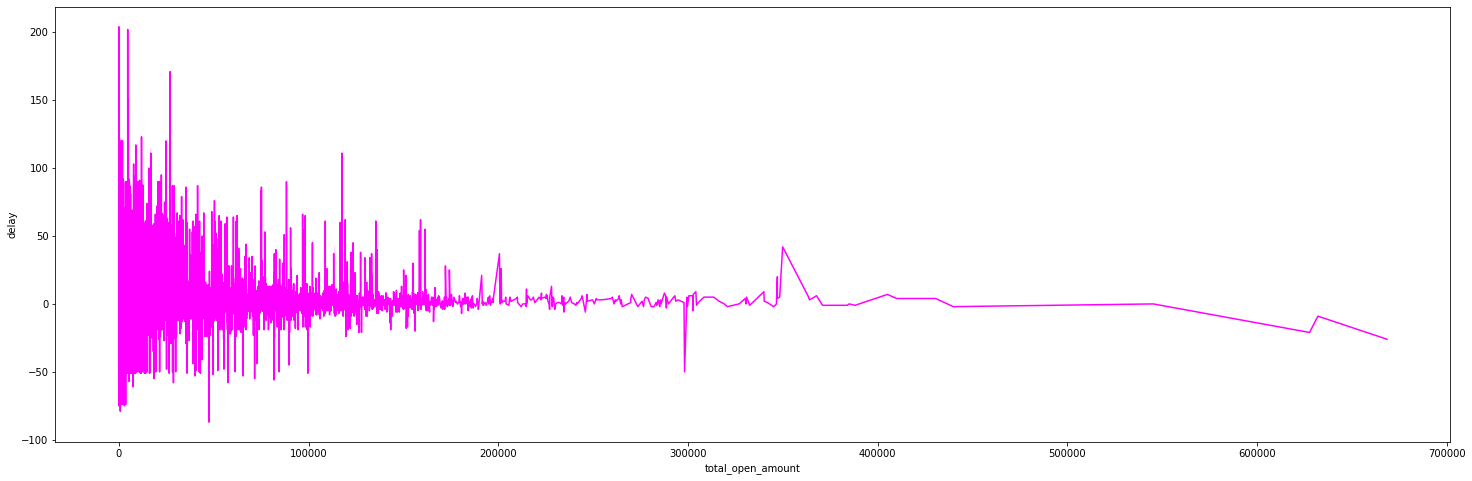

In [251]:
# This plot takes a lot of time
plt.figure(figsize=(25, 8))
sns.lineplot(x="total_open_amount", y="delay", data=X_train, color='magenta')
plt.show()

In [256]:
X_train.drop(columns=['delay'], axis=1, inplace=True)

,baseline_create_date,buisness_year,business_code,clear_date,cust_number,cust_payment_terms,document type,document_create_date.1,due_dt_day_of_week,due_dt_mon,due_dt_week,due_in_date,invoice_currency,is_weekend,mean_delay,total_open_amount
18601,2019-03-06,2019.0,U001,2019-03-18,200769623,NAH4,RV,2019-03-06,3,3,12,2019-03-21,USD,0,-2.724806,65379.00
12509,2019-04-15,2019.0,U001,2019-05-01,0200735528,NAA8,RV,2019-04-15,1,4,18,2019-04-30,USD,0,1.666667,160240.27
26403,2019-03-13,2019.0,U001,2019-03-28,0200711029,NAA8,RV,2019-03-13,3,3,13,2019-03-28,USD,0,0.704918,49580.54
30251,2019-10-15,2019.0,U001,2019-10-30,0200762301,NAC6,RV,2019-10-15,2,10,44,2019-10-30,USD,0,-0.367238,29565.17
45983,2019-11-24,2019.0,U001,2019-12-09,0200726979,NAA8,RV,2019-11-24,0,12,50,2019-12-09,USD,0,1.197032,422.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12658,2019-12-15,2019.0,U001,2019-12-30,0200726979,NAA8,RV,2019-12-15,0,12,1,2019-12-30,USD,0,1.197032,642.66
11618,2019-06-21,2019.0,U001,2019-08-02,CCCA02,NAG2,RV,2019-06-21,4,7,30,2019-07-26,USD,1,7.189911,12965.40
34951,2019-02-18,2019.0,U001,2019-03-11,0200726979,NAA8,RV,2019-02-18,1,3,10,2019-03-05,USD,0,1.197032,16301.69
36449,2019-10-10,2019.0,U001,2019-10-25,0200707822,NAA8,RV,2019-10-10,4,10,43,2019-10-25,USD,1,0.941320,65149.21


In [261]:
X_train.head(4).sort_index(axis=1)

,baseline_create_date,buisness_year,business_code,clear_date,cust_number,cust_payment_terms,document type,document_create_date.1,due_dt_day_of_week,due_dt_mon,due_dt_week,due_in_date,invoice_currency,is_weekend,mean_delay,total_open_amount
18601,2019-03-06,2019.0,U001,2019-03-18,200769623,NAH4,RV,2019-03-06,3,3,12,2019-03-21,USD,0,-2.724806,65379.00
12509,2019-04-15,2019.0,U001,2019-05-01,0200735528,NAA8,RV,2019-04-15,1,4,18,2019-04-30,USD,0,1.666667,160240.27
26403,2019-03-13,2019.0,U001,2019-03-28,0200711029,NAA8,RV,2019-03-13,3,3,13,2019-03-28,USD,0,0.704918,49580.54
30251,2019-10-15,2019.0,U001,2019-10-30,0200762301,NAC6,RV,2019-10-15,2,10,44,2019-10-30,USD,0,-0.367238,29565.17


In [262]:
null_clear_dates.head(4).sort_index(axis=1)

,area_business,baseline_create_date,buisness_year,business_code,cust_number,cust_payment_terms,document type,document_create_date,document_create_date.1,due_dt_day_of_week,...,due_in_date,invoice_currency,isOpen,is_weekend,mean_dates,mean_delay,name_customer,posting_date,posting_id,total_open_amount
3,NaN,2020-03-31,2020.0,CA02,0140105686,CA10,RV,2020-03-30,2020-03-30,4,...,2020-04-10,CAD,1,1,6.804651,6.804651,SYSC llc,2020-03-30,1.0,3299.70
7,NaN,2020-03-19,2020.0,U001,0200744019,NAA8,RV,2020-03-18,2020-03-19,4,...,2020-04-03,USD,1,1,2.231595,2.231595,TARG us,2020-03-19,1.0,11173.02
10,NaN,2020-03-11,2020.0,U001,0200418007,NAA8,RV,2020-03-06,2020-03-11,3,...,2020-03-26,USD,1,0,-1.621212,-1.621212,AM,2020-03-11,1.0,3525.59
14,NaN,2020-04-15,2020.0,U001,0200739534,NAA8,RV,2020-04-15,2020-04-15,3,...,2020-04-30,USD,1,0,1.993007,1.993007,OK systems,2020-04-15,1.0,121105.65


In [263]:
column_names = ["due_in_date", 'clear_date']

X_train.drop(column_names, axis=1, inplace=True)
X_validate.drop(column_names, axis=1, inplace=True)
X_test.drop(column_names, axis=1, inplace=True)
null_clear_dates.drop(column_names[0], axis=1, inplace=True)

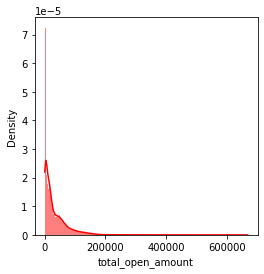

In [274]:
plt.figure(figsize=(4, 4))
sns.histplot(X_train["total_open_amount"], kde=True, stat="density", linewidth=0, color='red')
plt.show()

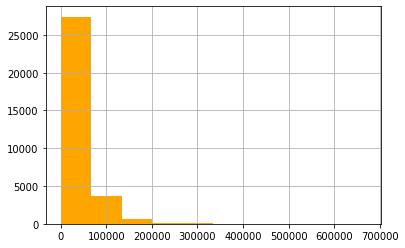

In [276]:
X_train.total_open_amount.hist(color="orange")
plt.show()

In [279]:
% pip install requests

  Using cached idna-3.3-py3-none-any.whl (61 kB)
  Using cached certifi-2021.10.8-py2.py3-none-any.whl (149 kB)


You should consider upgrading via the 'C:\Users\Ankur Paul\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [300]:
import requests

# Where USD is the base currency you want to use
url = 'https://v6.exchangerate-api.com/v6/7710711a0deef8d7cf086af7/latest/CAD/'

# Making our request
response = requests.get(url)
data = response.json()
conversion_rates = data['conversion_rates']


def get_exchange_rate(curr: str):
    return conversion_rates[curr]

In [302]:
# Get exchange rate using API
# rate = get_exchange_rate('USD')

# Converting CAD to USD
null_clear_dates["total_open_amount"] = np.where(
    (null_clear_dates["invoice_currency"] == "CAD")
    & (null_clear_dates["buisness_year"] == 2019),
    null_clear_dates["total_open_amount"] * 0.7538,
    null_clear_dates["total_open_amount"],
)
null_clear_dates["total_open_amount"] = np.where(
    (null_clear_dates["invoice_currency"] == "CAD")
    & (null_clear_dates["buisness_year"] == 2020),
    null_clear_dates["total_open_amount"] * 0.7461,
    null_clear_dates["total_open_amount"],
)

X_validate["total_open_amount"] = np.where(
    (X_validate["invoice_currency"] == "CAD") & (X_validate["buisness_year"] == 2019),
    X_validate["total_open_amount"] * 0.7538,
    X_validate["total_open_amount"],
)
X_validate["total_open_amount"] = np.where(
    (X_validate["invoice_currency"] == "CAD") & (X_validate["buisness_year"] == 2020),
    X_validate["total_open_amount"] * 0.7461,
    X_validate["total_open_amount"],
)
X_test1["total_open_amount"] = np.where(
    (X_test1["invoice_currency"] == "CAD") & (X_test1["buisness_year"] == 2019),
    X_test1["total_open_amount"] * 0.7538,
    X_test1["total_open_amount"],
)
X_test1["total_open_amount"] = np.where(
    (X_test1["invoice_currency"] == "CAD") & (X_test1["buisness_year"] == 2020),
    X_test1["total_open_amount"] * 0.7461,
    X_test1["total_open_amount"],
)

In [303]:
X_train["total_open_amount"].describe()

count     31998.000000
mean      31988.097805
std       39424.077605
min           0.790000
25%        4723.775000
50%       17198.545000
75%       46441.967500
max      668593.360000
Name: total_open_amount, dtype: float64

In [304]:
# Scaling the amount to a median, since too high values might fumble the model, and produce overfitting
X_train["amnt_log"] = np.log(X_train["total_open_amount"])
X_train["amnt_log"].describe()

count    31998.000000
mean         9.404386
std          1.779052
min         -0.235722
25%          8.460364
50%          9.752580
75%         10.745959
max         13.412931
Name: amnt_log, dtype: float64

In [306]:
null_clear_dates["amnt_log"] = np.log(null_clear_dates["total_open_amount"])
X_test1["amnt_log"] = np.log(X_test1["total_open_amount"])
X_validate["amnt_log"] = np.log(X_validate["total_open_amount"])

In [308]:
null_clear_dates.describe()

,buisness_year,posting_id,area_business,total_open_amount,isOpen,mean_dates,mean_delay,due_dt_week,due_dt_mon,due_dt_day_of_week,is_weekend,amnt_log
count,10000.0,10000.0,0.0,10000.000000,10000.0,9875.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2020.0,1.0,NaN,31461.190491,1.0,0.059772,0.069459,16.249000,4.068800,3.066200,0.438400,9.472757
std,0.0,0.0,NaN,34691.225950,0.0,5.041538,5.010666,3.063517,0.760476,1.899573,0.496216,1.724033
min,2020.0,1.0,NaN,0.720000,1.0,-37.000000,-37.000000,9.000000,2.000000,0.000000,0.000000,-0.328504
25%,2020.0,1.0,NaN,5514.900000,1.0,-2.373147,-2.373147,14.000000,4.000000,1.000000,0.000000,8.615209
50%,2020.0,1.0,NaN,18874.069821,1.0,-0.358127,-0.291139,16.000000,4.000000,3.000000,0.000000,9.845544
75%,2020.0,1.0,NaN,46878.741726,1.0,1.267857,1.221757,19.000000,5.000000,5.000000,1.000000,10.755320
max,2020.0,1.0,NaN,653644.800000,1.0,64.608108,64.608108,28.000000,7.000000,6.000000,1.000000,13.390319


In [309]:
X_test1.describe()

,buisness_year,total_open_amount,mean_delay,due_dt_week,due_dt_mon,due_dt_day_of_week,is_weekend,amnt_log
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.00000,4000.000000
mean,2019.125500,31956.720244,0.899510,24.985000,6.150750,3.13350,0.44475,9.380004
std,0.331326,38050.227578,7.424585,15.055529,3.471821,1.88217,0.49700,1.835959
min,2019.000000,12.270000,-25.000000,1.000000,1.000000,0.00000,0.00000,2.507157
25%,2019.000000,4559.537500,-2.373147,11.000000,3.000000,2.00000,0.00000,8.424976
50%,2019.000000,17837.135000,0.363636,24.000000,6.000000,3.00000,0.00000,9.789037
75%,2019.000000,46740.627495,1.689498,38.000000,9.000000,5.00000,1.00000,10.752369
max,2020.000000,525663.660000,123.000000,52.000000,12.000000,6.00000,1.00000,13.172417


In [310]:
X_validate.describe()

,buisness_year,total_open_amount,mean_delay,due_dt_week,due_dt_mon,due_dt_day_of_week,is_weekend,amnt_log
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2019.138500,29787.258386,0.752495,24.652500,6.080000,3.064500,0.433000,9.336690
std,0.345467,35208.860851,7.375589,14.984521,3.457902,1.888844,0.495553,1.783578
min,2019.000000,2.400000,-79.000000,1.000000,1.000000,0.000000,0.000000,0.875469
25%,2019.000000,4407.260285,-2.373147,11.000000,3.000000,2.000000,0.000000,8.391009
50%,2019.000000,16662.130000,0.318182,23.000000,6.000000,3.000000,0.000000,9.720894
75%,2019.000000,44509.922500,1.578571,38.000000,9.000000,5.000000,1.000000,10.703467
max,2020.000000,535045.040000,75.000000,52.000000,12.000000,6.000000,1.000000,13.190106


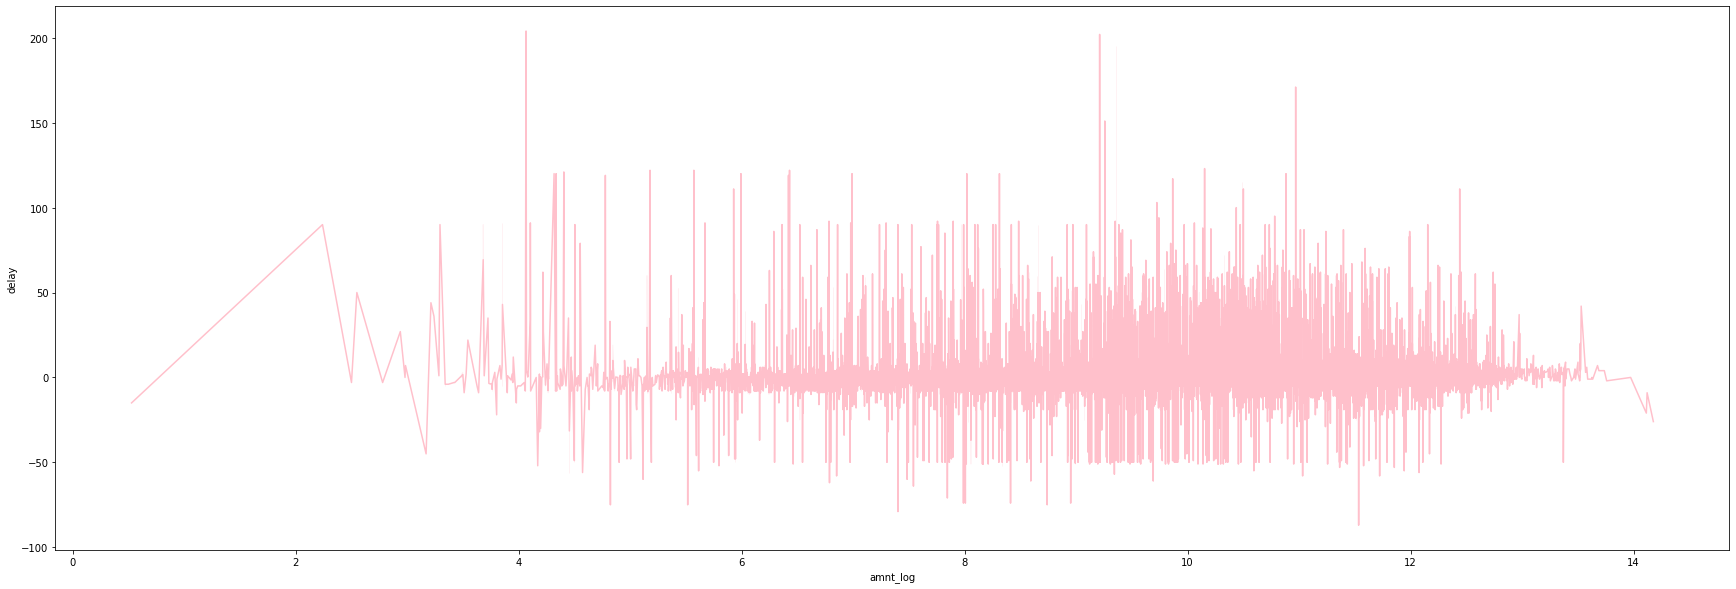

In [315]:
plt.figure(figsize=(30, 10))
sns.lineplot(x=X_train["amnt_log"], y=y_train, color="pink")
plt.show()

In [313]:
X_train["amnt_log"].sort_values(ascending=True)

45063    -0.235722
42127     1.477049
9806      1.736951
42628     1.785070
43588     2.016235
           ...    
42367    12.994348
24375    13.209201
14843    13.349903
6887     13.356857
1804     13.412931
Name: amnt_log, Length: 31998, dtype: float64

In [314]:
X_train["amnt_log"] = X_train["amnt_log"] + 0.765

# since the amount cant be negative so i am adding all the values wiht 0.4 so that the min value(-0.235) will get positive.
# as we cant have amount due in -ves.

X_train.drop("total_open_amount", axis=1, inplace=True)

In [316]:
X_validate["amnt_log"] = X_validate["amnt_log"] + 1.5
X_validate.drop("total_open_amount", axis=1, inplace=True)
X_test1.drop("total_open_amount", axis=1, inplace=True)

In [317]:
# Since the amount cant be negative so i am adding all the values wiht 1.6 so that the min value will get positive.
null_clear_dates["amnt_log"] = null_clear_dates["amnt_log"] + 1.6
null_clear_dates.drop("total_open_amount", axis=1, inplace=True)

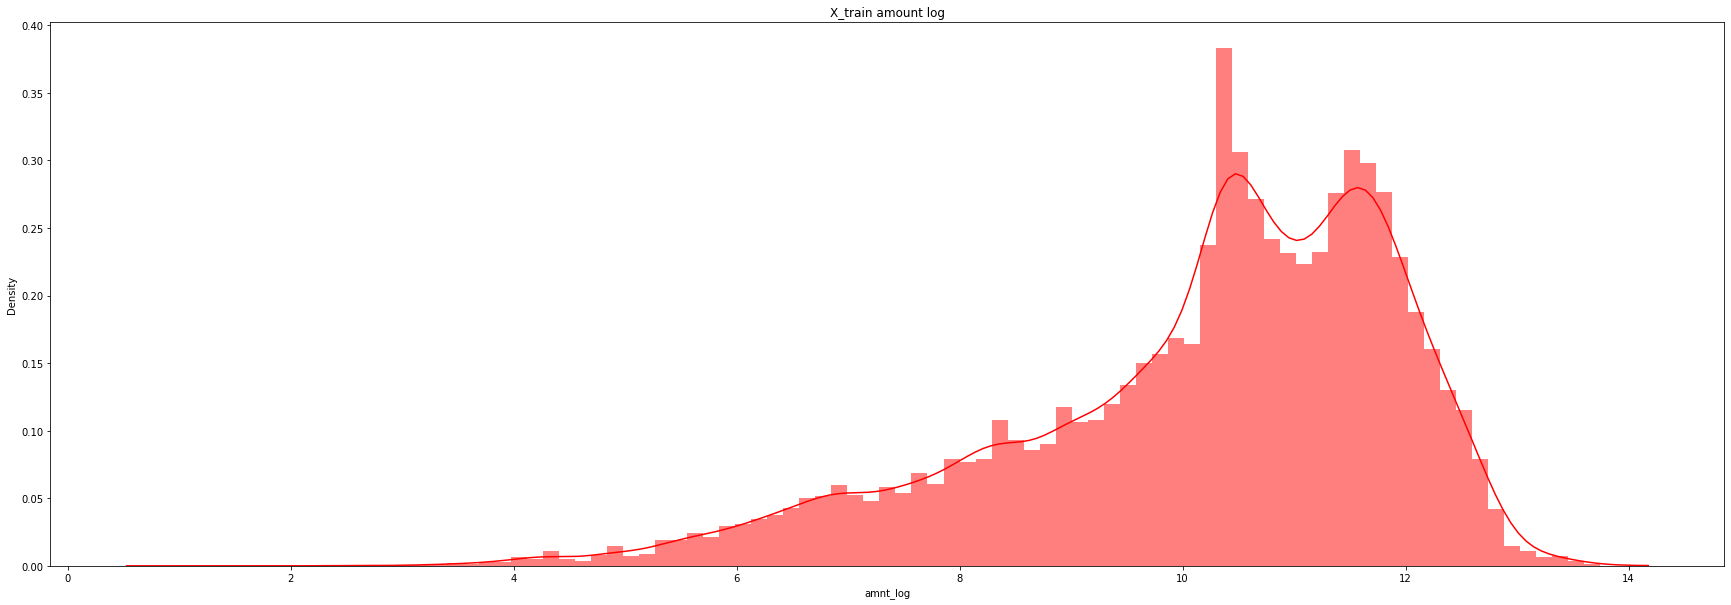

In [322]:
plt.figure(figsize=(30, 10))
sns.histplot(X_train["amnt_log"], kde=True, stat="density", linewidth=0, color='red')
plt.title("X_train amount log")

plt.show()

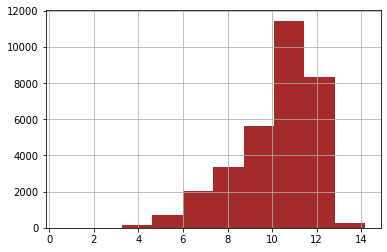

In [324]:
X_train.amnt_log.hist(color='brown')
plt.show()

<Figure size 2160x720 with 0 Axes>

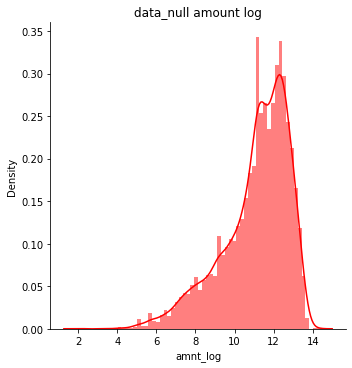

In [327]:
plt.figure(figsize=(30, 10))
sns.displot(null_clear_dates["amnt_log"], kde=True, stat="density", linewidth=0, color="red")
plt.title("data_null amount log")

plt.show()